# EPL, Championship, League 1, League 2, Bundesliga, Serie A, La Liga & Ligue 1 Data 2005/2006 - 2018/2019




In [280]:
import jupyterthemes as jt
!jt -r

Reset css and font defaults in:
C:\Users\Jamie\.jupyter\custom &
C:\Users\Jamie\AppData\Roaming\jupyter\nbextensions


In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import os
import glob
from itertools import groupby
import warnings 
plt.style.use("ggplot")
warnings.filterwarnings("ignore")
%matplotlib inline 

# Importing\Cleaning Data

In [282]:
path = r"C:\Users\Jamie\OneDrive\Football Data\Football-Data.co.uk\Big 5 Leagues (05-06 to 18-19)"
all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat(pd.read_csv(f) for f in all_files)

In [283]:
df = df[["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "HTHG", 
         "HTAG", "HTR", "FTR", "HS", "AS", "HST", "AST", "HC", "AC", 
         "HY", "AY", "HR", "AR", "B365H", "B365D", "B365A"]] 
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Div'] = df['Div'].map({"E0": "EPL", "E1" : "Championship", "E2": "League 1", "E3": "League 2", 
                           "D1": "Bundesliga", "F1" : "Ligue 1", "I1" : "Serie A",
                           "SP1": "La Liga"})
df = df.sort_values(by="Date")
full_df = df.copy()

In [284]:
for col in df.columns: # checking for null values
    nulls = sum(pd.isnull(df[col]))
    print(f"{col}:{nulls}")

Div:0
Date:0
HomeTeam:0
AwayTeam:0
FTHG:0
FTAG:0
HTHG:4
HTAG:4
HTR:4
FTR:0
HS:18
AS:18
HST:324
AST:324
HC:393
AC:393
HY:4
AY:3
HR:3
AR:3
B365H:6
B365D:6
B365A:6


In [285]:
df = df.dropna(how = "any", axis = 0)
df.reset_index(inplace = True)
df.drop("index", axis = 1, inplace = True)

# Functions

In [286]:
def total_goals(team):
    """Total goals for a given team for the whole dataset."""
    
    return df[df["HomeTeam"] == team].sum()["FTHG"] + df[df["AwayTeam"] == team].sum()["FTAG"]

def total_shots(team):
    """Total shots for a given team for the whole dataset."""
    
    return df[df["HomeTeam"] == team].sum()["HS"] + df[df["AwayTeam"] == team].sum()["AS"]

def ratio(team):
    """Conversion rate for a given team."""
    
    return total_goals(team)/total_shots(team)

def winning_team(x):
    """Winning team name. x is a row of the DataFrame"""
    
    if x["FTR"] == "H":
        return x["HomeTeam"]
    elif x["FTR"] == "A":
        return x["AwayTeam"]
    else:
        return "D"
    
def winstreak(team):
    """ Maximum number of consecutive wins for a given team."""
    
    new_df = full_df[(full_df["HomeTeam"] == team) | (full_df["AwayTeam"] == team)]
    lst = []
    for n,c in groupby(new_df["Winner"]):
        num, count = n, sum(1 for i in c)
        lst.append((num, count))
        
    max_win_streak = max(y for x,y in lst if x == team)
    
    return max_win_streak

def drawstreak(team):
    """Maximum number of consecutive draws for a given team."""
    
    new_df = full_df[(full_df["HomeTeam"] == team) | (full_df["AwayTeam"] == team)]
    lst = []
    for n,c in groupby(new_df["Winner"]):
        num, count = n, sum(1 for i in c)
        lst.append((num, count))
        
    max_draw_streak = max(y for x,y in lst if x == "D")
    
    return max_draw_streak

def losing(team):
    """Maximum number of consecutive losses for a given team."""
    
    new_df = full_df[(full_df["HomeTeam"] == team) | (full_df["AwayTeam"] == team)]
    best_sum = 0
    current_sum = 0
    for i in new_df["Winner"]:
        if i != team and i != "D":
            current_sum = max(0, current_sum + 1)
            best_sum = max(current_sum, best_sum)
        else:
            current_sum = 0
    return best_sum

def winless(team):
    """Maximum number of consecutive games without a win for a given team."""
    
    new_df = full_df[(full_df["HomeTeam"] == team) | (full_df["AwayTeam"] == team)]
    best_sum = 0
    current_sum = 0
    for i in new_df["Winner"]:
        if i != team:
            current_sum = max(0, current_sum + 1)
            best_sum = max(current_sum, best_sum)
        else:
            current_sum = 0
    return best_sum
        

def unbeaten(team):
    """Maximum number of games unbeaten for a givent team."""
    
    new_df = full_df[(full_df["HomeTeam"] == team) | (full_df["AwayTeam"] == team)]
    best_sum = 0
    current_sum = 0
    for i in new_df["Winner"]:
        if i == team or i == "D":
            current_sum = max(0, current_sum + 1)
            best_sum = max(current_sum, best_sum)
        else:
            current_sum = 0
    return best_sum

    
def total_ht_home_deficits(team):
    """Total games where home team were behind at HT"""
    
    deficits = len(df[(df["HomeTeam"] == team) & (df["HTR"] == "A")])
    return deficits

def total_ht_away_deficits(team):
    """"Total games where away team were behind at HT"""
    
    deficits = len(df[(df["AwayTeam"] == team) & (df["HTR"] == "H")])
    return deficits

def full_time_score(x):
    """Full time score. x is row of DataFrame."""
    
    if x["FTHG"] == x["FTAG"]:
        return str(x["FTHG"]) + " " + "-" + " " + str(x["FTAG"])
    if x["FTHG"] > x["FTAG"]:
        return str(x["FTHG"]) + " " + "-" + " " + str(x["FTAG"])
    else:
        return str(x["FTAG"]) + " " + "-" + " " + str(x["FTHG"])
    
def missing_odds(x):
    """B365H = 0 for some entries, this deals with them."""
    if x["B365H"] == float(0):
        return round(1/(1-(1/x["B365D"]) - (1/x["B365A"])),2)
    else:
        return x["B365H"]

# Goals/Shots

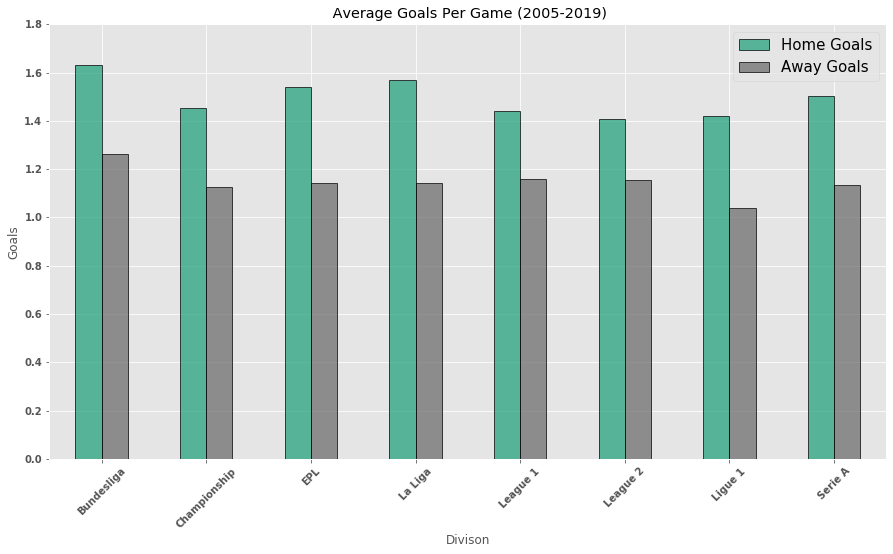

In [287]:
df_home_vs_away_goals = df.groupby("Div").agg({"FTHG":"mean","FTAG":"mean"})
df_home_vs_away_goals.plot.bar(figsize = (15,8), title = "Home Goals vs Away Goals", 
                               colormap = "Dark2", rot = 45, alpha = 0.7,
                               linewidth =1, edgecolor = "k")
plt.xlabel("Divison")
plt.ylabel("Goals")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.title(" Average Goals Per Game (2005-2019)")
plt.legend(["Home Goals", "Away Goals"], prop = {'size': 15});

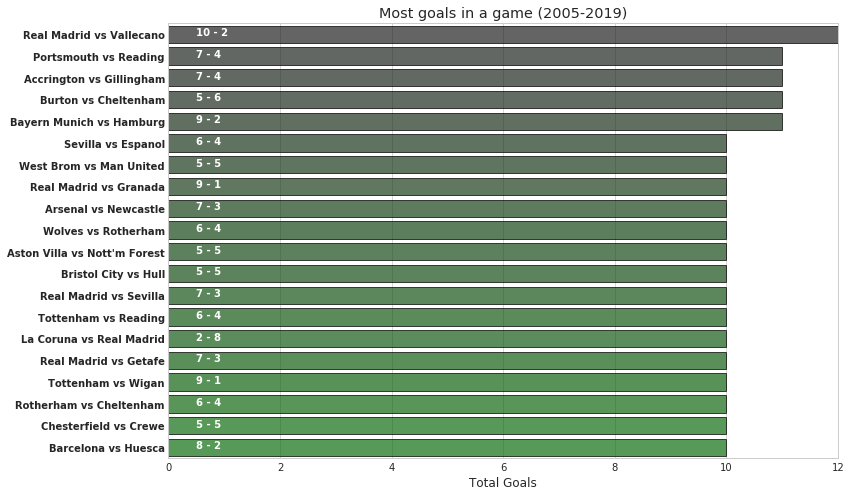

In [288]:
df_most_goals = df[:]
df_most_goals["TG"] = df_most_goals["FTHG"] + df_most_goals["FTAG"]
df_most_goals = df_most_goals.sort_values(by = "TG", ascending=False)[:20]
df_most_goals["Match"] = df_most_goals["HomeTeam"] + " " + "vs" + " " + df_most_goals["AwayTeam"]
with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize = (12,8))
    ax = sns.barplot(y="Match", x="TG", data=df_most_goals[:20],
                linewidth = 1, edgecolor = "k", alpha = 0.7, palette=sns.dark_palette("green", 20))
    plt.ylabel("")
    plt.xlabel("Total Goals")
    plt.yticks(weight="bold")
    plt.yticks(weight="bold")
    plt.title("Most goals in a game (2005-2019)")
    for i, j in enumerate(df_most_goals["TG"]):
        ax.text(0.5,i+0.05, 
             str(df_most_goals["FTHG"].iloc[i]) + " " + "-" + " " + str(df_most_goals["FTAG"].iloc[i]),
             weight = "bold", color = "white");

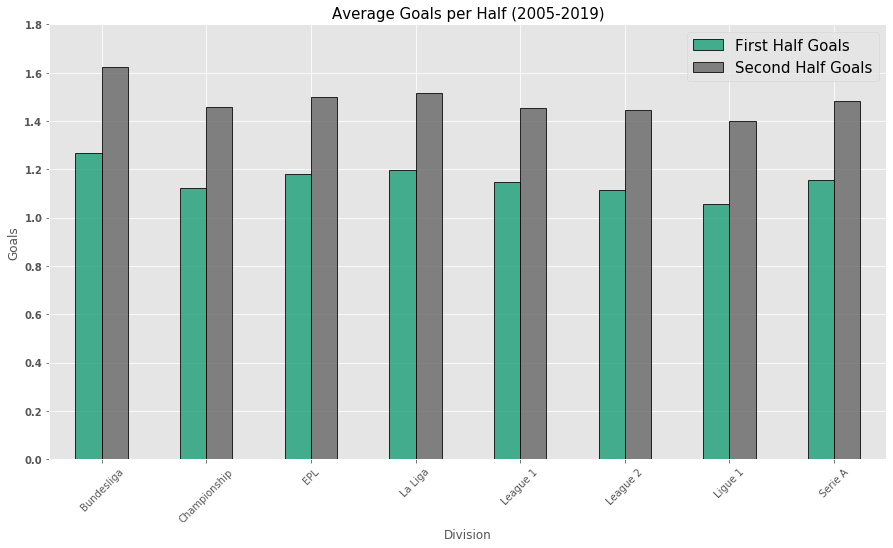

In [289]:
df_goals_proportion = df[["Div", "FTHG", "FTAG", "HTHG", "HTAG"]]
df_goals_proportion["Total Goals"] = df_goals_proportion["FTHG"] + df_goals_proportion["FTAG"]
df_goals_proportion["First Half Goals"] = df_goals_proportion["HTHG"] + df_goals_proportion["HTAG"]
df_goals_proportion["Second Half Goals"] = df_goals_proportion["Total Goals"] - df_goals_proportion["First Half Goals"]
(df_goals_proportion.groupby("Div").mean()[["First Half Goals", "Second Half Goals"]]
            .plot.bar(figsize = (15,8), rot = 45, colormap = "Dark2", 
                      edgecolor = "k", linewidth = 1, 
                      alpha = 0.8))
plt.xlabel("Division")
plt.ylabel("Goals")
plt.yticks(weight="bold")
plt.yticks(weight="bold")
plt.title("Average Goals per Half (2005-2019)", fontsize = 15)
plt.legend(prop = {"size":15});

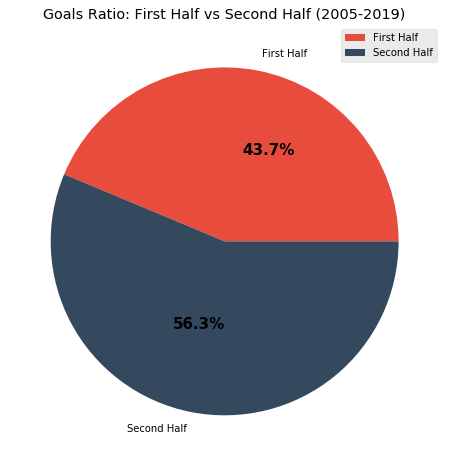

In [290]:
df_goals_percentage = df_goals_proportion.mean()[["Total Goals", "First Half Goals", "Second Half Goals"]]
df_goals_percentage["First Half"] = df_goals_percentage["First Half Goals"]/df_goals_percentage["Total Goals"]
df_goals_percentage["Second Half"] = df_goals_percentage["Second Half Goals"]/df_goals_percentage["Total Goals"]

df_goals_percentage = pd.DataFrame({"%":[0.437, 0.563]}, index = ["First Half", "Second Half"])

df_goals_percentage.plot.pie(y = "%", figsize = (12,8), colors = ["#e74c3c", "#34495e"] )
plt.title("Goals Ratio: First Half vs Second Half (2005-2019)")
plt.text(0.1, 0.5, "43.7%", weight = "bold", fontsize = 15)
plt.text(-0.3, -0.5, "56.3%", weight = "bold", fontsize = 15)
plt.ylabel("");

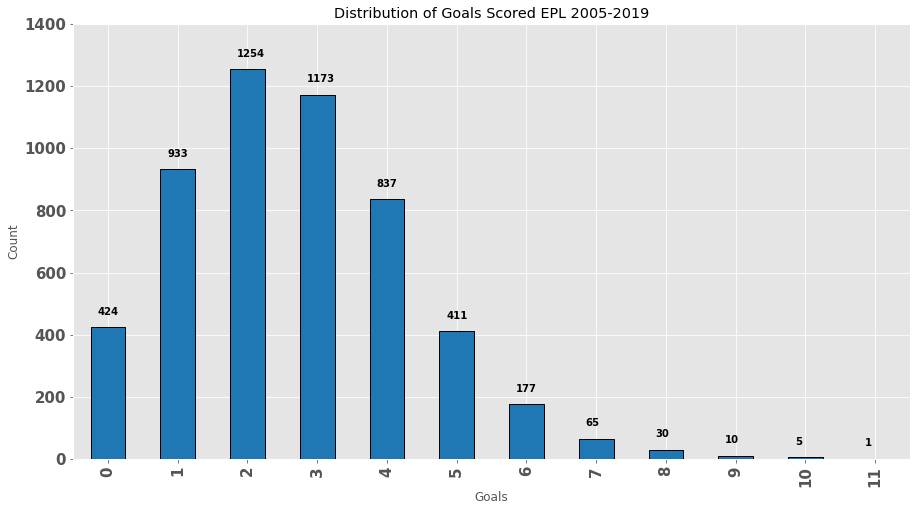

In [291]:
df_EPL = df[df["Div"] == "EPL"]
df_EPL["Total Goals"] = df_EPL["FTHG"] + df_EPL["FTAG"]

ax = (df_EPL["Total Goals"].value_counts().reindex(index = [0,1,2,3,4,5,6,7,8,9,10,11])
      .plot.bar(figsize = (15,8), fontsize = 15, colormap = "tab10", 
                edgecolor = "k", linewidth = 1))
plt.title("Distribution of Goals Scored EPL 2005-2019")
plt.xlabel("Goals")
plt.ylabel("Count")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
for i,j in enumerate(df_EPL["Total Goals"].value_counts().reindex(index = [0,1,2,3,4,5,6,7,8,9,10,11])):
    ax.text(i-0.15, j + 50, j, va = "center", weight = "bold")

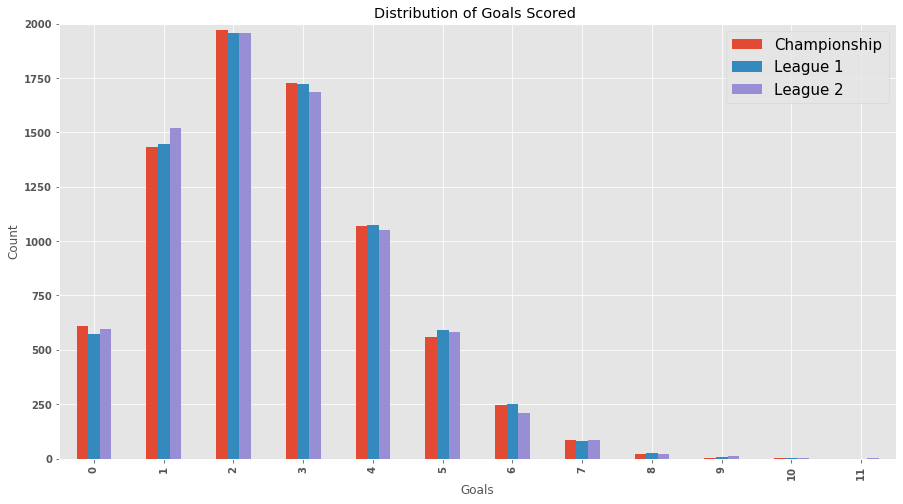

In [292]:
df_ENG = df[(df["Div"] == "Championship") | (df["Div"] == "League 1") | (df["Div"] == "League 2")]
df_ENG["Total Goals"] = df_ENG["FTHG"]  + df_ENG["FTAG"]
df_ENG.groupby(["Total Goals", "Div"]).count()["Date"].unstack().plot.bar(figsize = (15,8))
plt.xlabel("Goals")
plt.ylabel("Count")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.legend(prop = {"size": 15})
plt.title("Distribution of Goals Scored ");

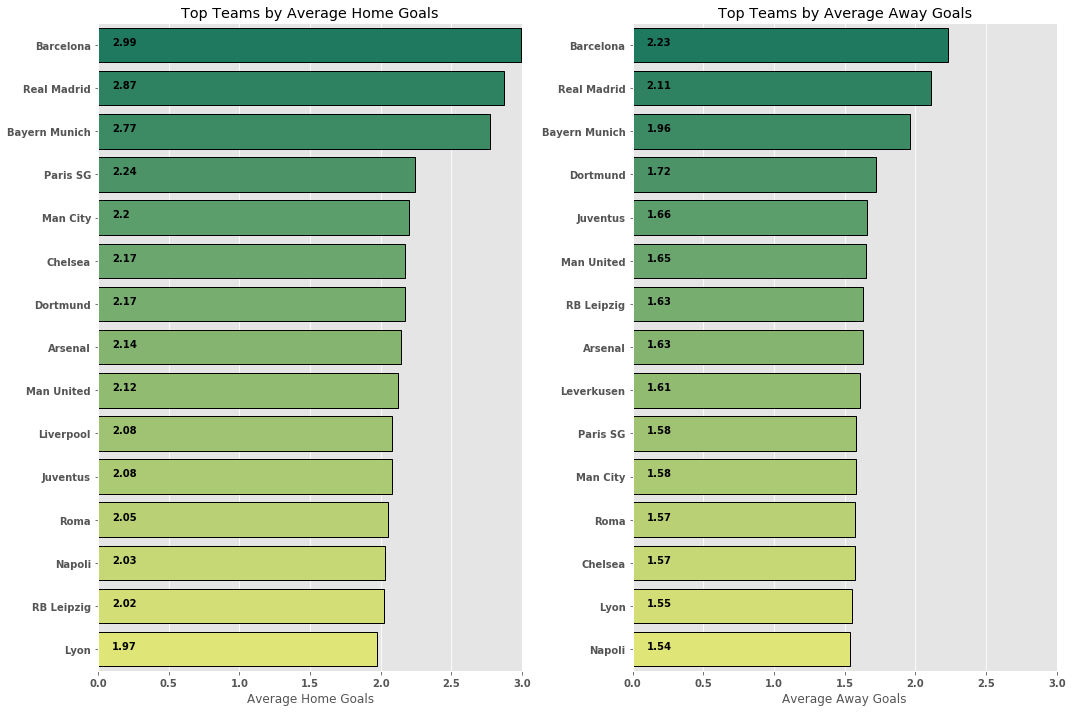

In [293]:
home_goals = (df.groupby("HomeTeam").mean()["FTHG"].round(2).reset_index()
              .sort_values(by = "FTHG", ascending = False))
away_goals = (df.groupby("AwayTeam").mean()["FTAG"].round(2).reset_index()
              .sort_values(by = "FTAG", ascending = False))
plt.figure(figsize = (15,10))
plt.subplot(121)
ax = sns.barplot(y = "HomeTeam", x = "FTHG",
                data = home_goals[:15], palette = "summer",
                linewidth = 1, edgecolor = "k")
plt.title("Top Teams by Average Home Goals")
plt.ylabel("")
plt.xlabel("Average Home Goals")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
for i, j in enumerate(home_goals["FTHG"][:15]):
    ax.text(0.1,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y = "AwayTeam", x = "FTAG",
                data = away_goals[:15], palette = "summer",
                linewidth = 1, edgecolor = "k")
plt.title("Top Teams by Average Away Goals")
plt.ylabel("")
plt.xlabel("Average Away Goals")
plt.xlim((0,3))
plt.xticks(weight="bold")
plt.yticks(weight="bold")
for i, j in enumerate(away_goals["FTAG"][:15]):
    ax.text(0.1,i,j,weight = "bold")
plt.tight_layout()

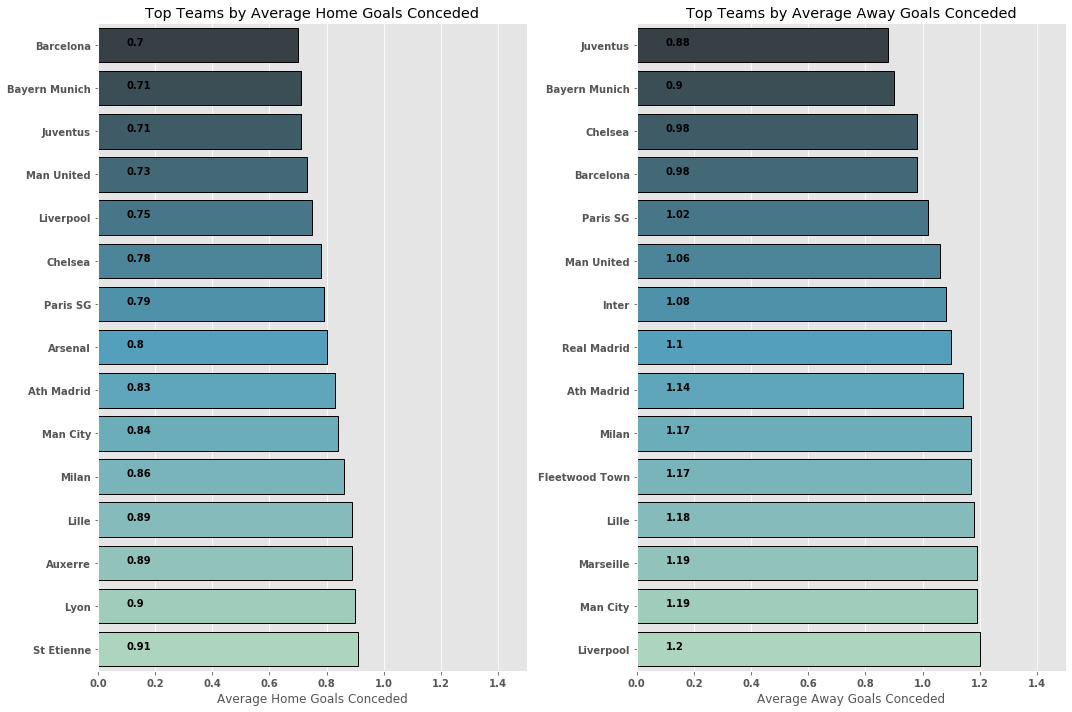

In [294]:
goals_conceded_at_home = (df.groupby("HomeTeam").mean()["FTAG"].round(2).reset_index()
                          .sort_values(by = "FTAG", ascending = True))
goals_conceded_away = (df.groupby("AwayTeam").mean()["FTHG"].round(2).reset_index()
                       .sort_values(by = "FTHG", ascending = True))
plt.figure(figsize = (15,10))
plt.subplot(121)
ax = sns.barplot(y = "HomeTeam", x = "FTAG",
                data = goals_conceded_at_home[:15], palette = "GnBu_d",
                linewidth = 1, edgecolor = "k")
plt.title("Top Teams by Average Home Goals Conceded")
plt.ylabel("")
plt.xlabel("Average Home Goals Conceded")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
for i, j in enumerate(goals_conceded_at_home["FTAG"][:15]):
    ax.text(0.1,i,j,weight = "bold")
plt.xlim((0,1.5))
plt.subplot(122)
ax = sns.barplot(y = "AwayTeam", x = "FTHG",
                data = goals_conceded_away[:15], palette = "GnBu_d",
                linewidth = 1, edgecolor = "k")
plt.title("Top Teams by Average Away Goals Conceded")
plt.ylabel("")
plt.xlabel("Average Away Goals Conceded")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
for i, j in enumerate(goals_conceded_away["FTHG"][:15]):
    ax.text(0.1,i,j,weight = "bold")
plt.xlim((0,1.5))
plt.tight_layout()

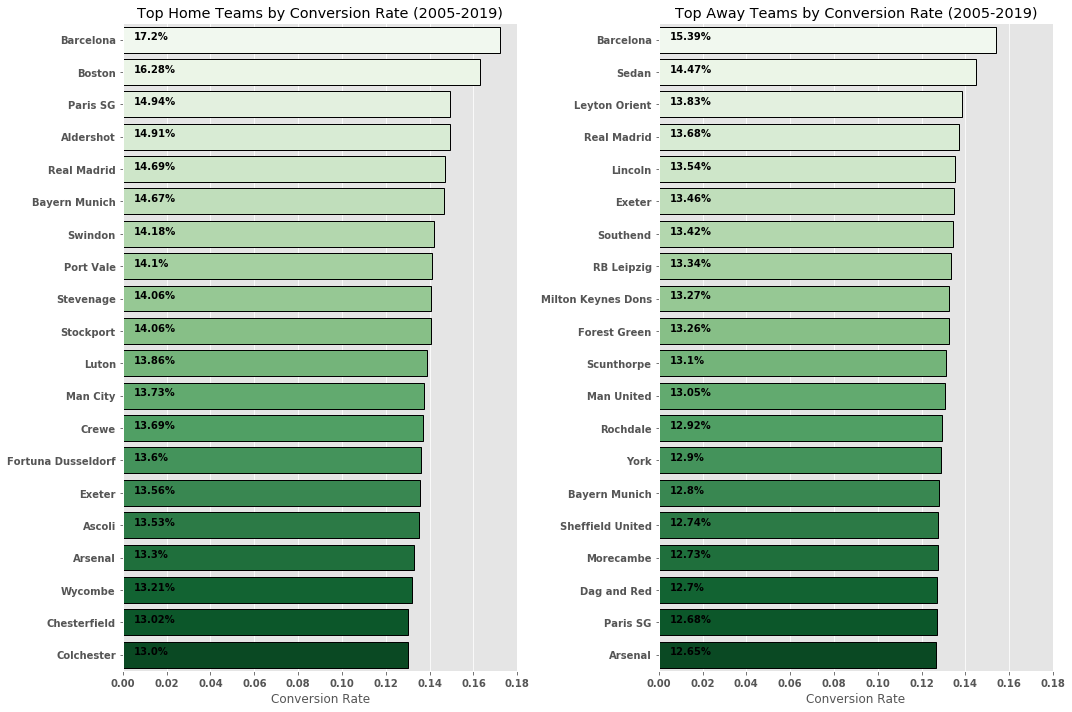

In [295]:
df_conversion_rate_home = (df.groupby("HomeTeam")
                           .agg({"HS":"sum", "FTHG":"sum"}).reset_index())
df_conversion_rate_home["Conversion Rate"] = df_conversion_rate_home["FTHG"]/df_conversion_rate_home["HS"]
df_conversion_rate_away = (df.groupby("AwayTeam")
                           .agg({"AS":"sum", "FTAG":"sum"}).reset_index())
df_conversion_rate_away["Conversion Rate"] = df_conversion_rate_away["FTAG"]/df_conversion_rate_away["AS"]

df_conversion_rate_home.sort_values(by = "Conversion Rate", 
                                    inplace = True, ascending = False)
df_conversion_rate_away.sort_values(by = "Conversion Rate", 
                                    inplace = True, ascending = False)

plt.figure(figsize=(15,10))
plt.subplot(121)
ax = sns.barplot(y = "HomeTeam", x = "Conversion Rate",
                data = df_conversion_rate_home[:20], linewidth = 1, edgecolor = "k", palette = "Greens")
plt.title("Top Home Teams by Conversion Rate (2005-2019)")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.ylabel("")

for i, j in enumerate(df_conversion_rate_home["Conversion Rate"][:20]):
                     ax.text(0.005,i,str(round(100*j, 2)) + "%", weight = "bold")

plt.subplot(122)
ax = sns.barplot(y = "AwayTeam", x = "Conversion Rate",
                data = df_conversion_rate_away[:20], linewidth = 1, edgecolor = "k", palette = "Greens")
plt.title("Top Away Teams by Conversion Rate (2005-2019)")
plt.ylabel("")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
for i, j in enumerate(df_conversion_rate_away["Conversion Rate"][:20]):
                     ax.text(0.005,i,str(round(100*j, 2)) + "%", weight = "bold")
plt.xlim((0,0.18))
        
plt.tight_layout()

# Cards

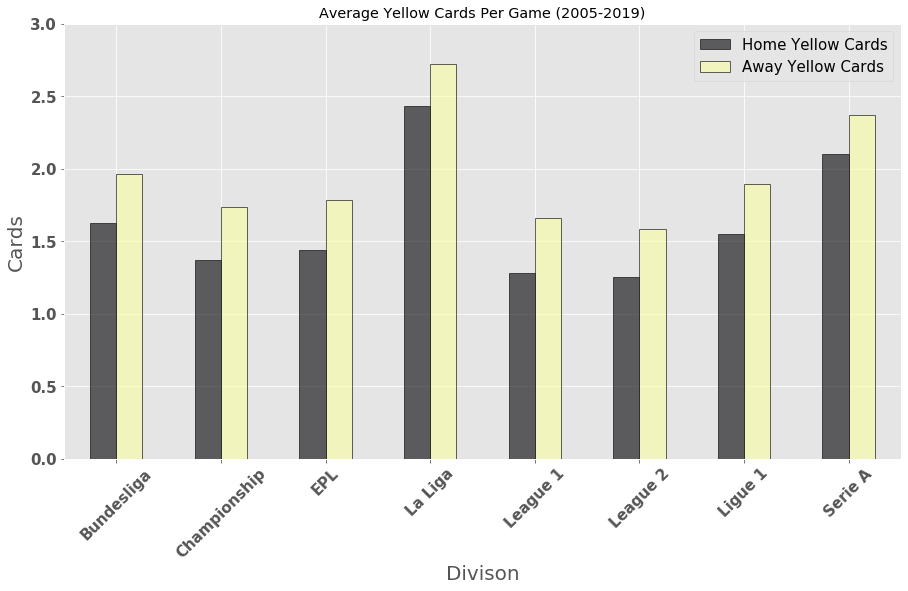

In [296]:
df_yellows_by_league = df.groupby("Div").agg({"HY":"mean", "AY": "mean"})
df_yellows_by_league.plot.bar(figsize = (15,8), title = "Home Yellows vs Away Yellows", 
                              colormap = "inferno", rot = 45, fontsize = 15, alpha = 0.6, 
                              linewidth = 1, edgecolor = "k")
plt.xlabel("Divison", fontsize = 20)
plt.ylabel("Cards", fontsize = 20)
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.title("Average Yellow Cards Per Game (2005-2019)")
plt.legend(["Home Yellow Cards", "Away Yellow Cards"], prop = {'size': 15});

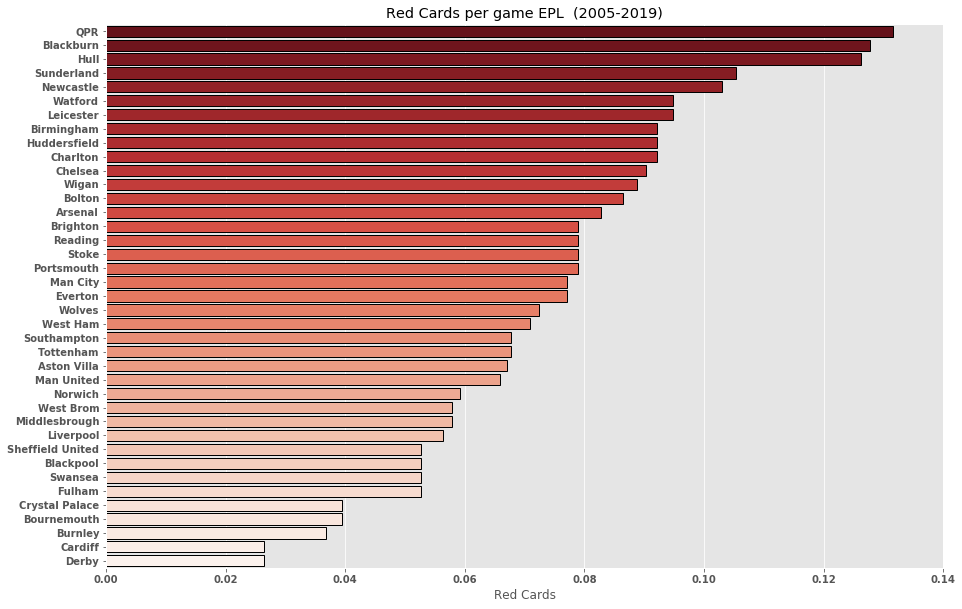

In [297]:
df_EPL_reds_home = (df[df["Div"] == "EPL"].groupby("HomeTeam").agg({"HR": "mean"})
                    .reset_index().sort_values(by = "HR", ascending = False))
df_EPL_reds_away = (df[df["Div"] == "EPL"].groupby("AwayTeam").agg({"AR": "mean"})
                    .reset_index().sort_values(by = "AR", ascending = False))

df_EPL_reds_home["Red Cards"] = (df_EPL_reds_home["HR"] + df_EPL_reds_away["AR"])/2
df_EPL_reds = df_EPL_reds_home.sort_values(by = "Red Cards", ascending = False)

my_colors = sns.cubehelix_palette(50, start = 2, rot = 0, dark = 0, light = 0.95, reverse = True)

plt.figure(figsize = (15,10))
ax = sns.barplot( y = "HomeTeam", x = "Red Cards", 
                 data = df_EPL_reds, palette = "Reds_r", linewidth = 1, edgecolor = "k")
plt.ylabel("")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.title("Red Cards per game EPL  (2005-2019)");


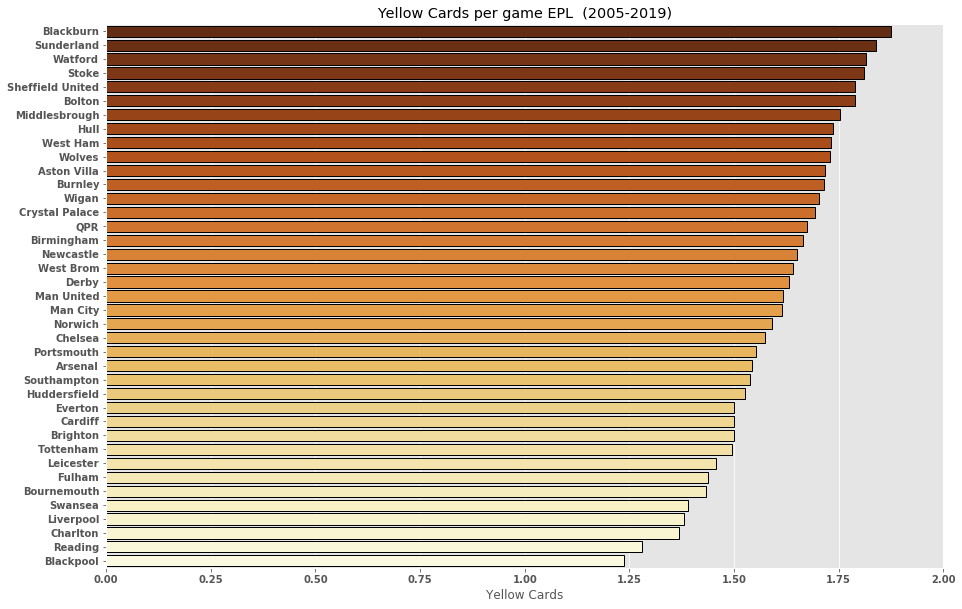

In [298]:
df_EPL_yellows_home = (df[df["Div"] == "EPL"].groupby("HomeTeam").agg({"HY": "mean"})
                       .reset_index().sort_values(by = "HY", ascending = False))
df_EPL_yellows_away = (df[df["Div"] == "EPL"].groupby("AwayTeam").agg({"AY": "mean"})
                       .reset_index().sort_values(by = "AY", ascending = False))

df_EPL_yellows_home["Yellow Cards"] = (df_EPL_yellows_home["HY"] + df_EPL_yellows_away["AY"])/2
df_EPL_yellows = df_EPL_yellows_home.sort_values(by = "Yellow Cards", ascending = False)

plt.figure(figsize = (15,10))
ax = sns.barplot(y = "HomeTeam", x = "Yellow Cards", 
                 data = df_EPL_yellows, palette = "YlOrBr_r", edgecolor = "k", linewidth = 1)
plt.ylabel("")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.title("Yellow Cards per game EPL  (2005-2019)");


# Corners

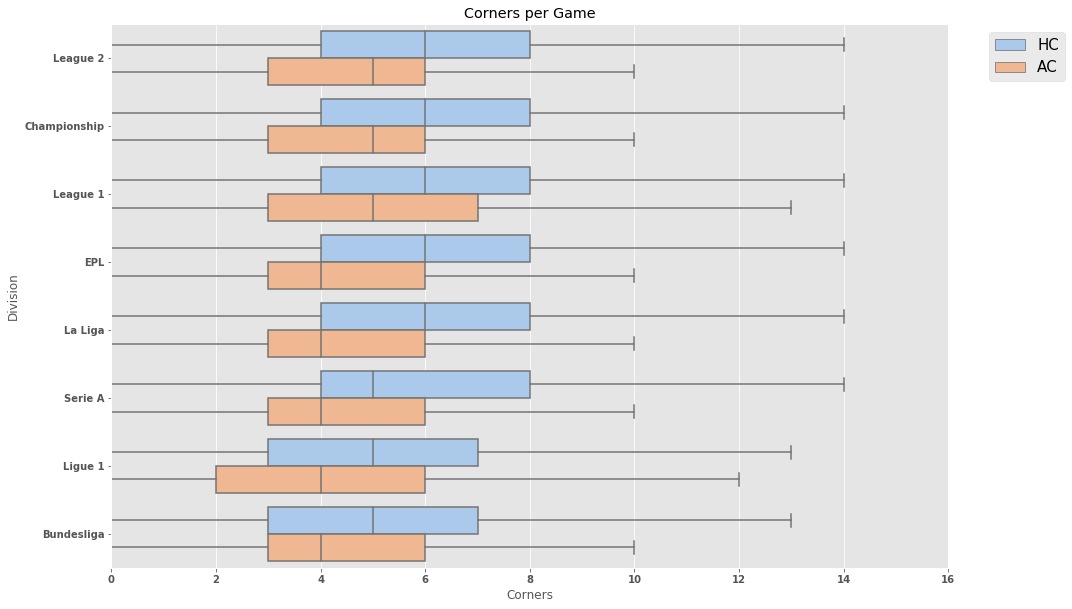

In [299]:
plt.figure(figsize = (15,10))
df_corners = df[["Div", "HC", "AC"]]
df_corners = df_corners.melt(value_vars = ["HC", "AC"], id_vars = "Div")
sns.boxplot(y = "Div", x = "value", hue = "variable", data = df_corners, orient = "h",
           showfliers = False, palette = "pastel")
plt.title("Corners per Game")
plt.ylabel("Division")
plt.xlabel("Corners")
plt.xlim((0,16))
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop = {"size": 15});

# Results

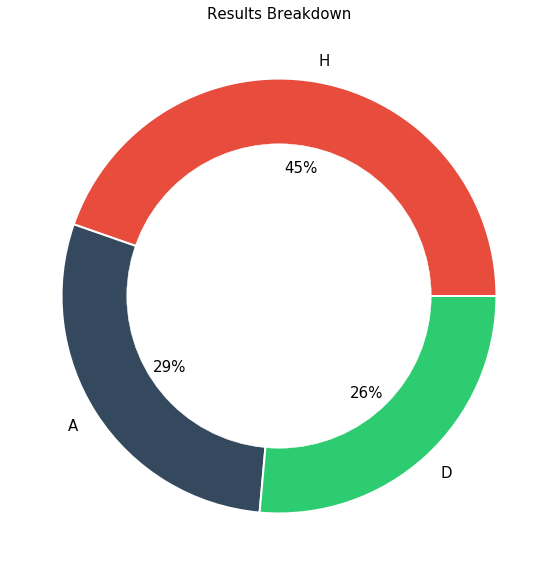

In [300]:
colors = ["#e74c3c", "#34495e", "#2ecc71"]
colors1 = sns.color_palette("hls",3)
plt.figure(figsize=(10,10))
df["FTR"].value_counts().plot.pie(autopct = "%1.0f%%",
                                  colors = colors,
                                  wedgeprops = {"linewidth":2,"edgecolor":"white"},
                                  textprops = {"fontsize": 15})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("Results Breakdown", fontsize = 15)
plt.ylabel("");

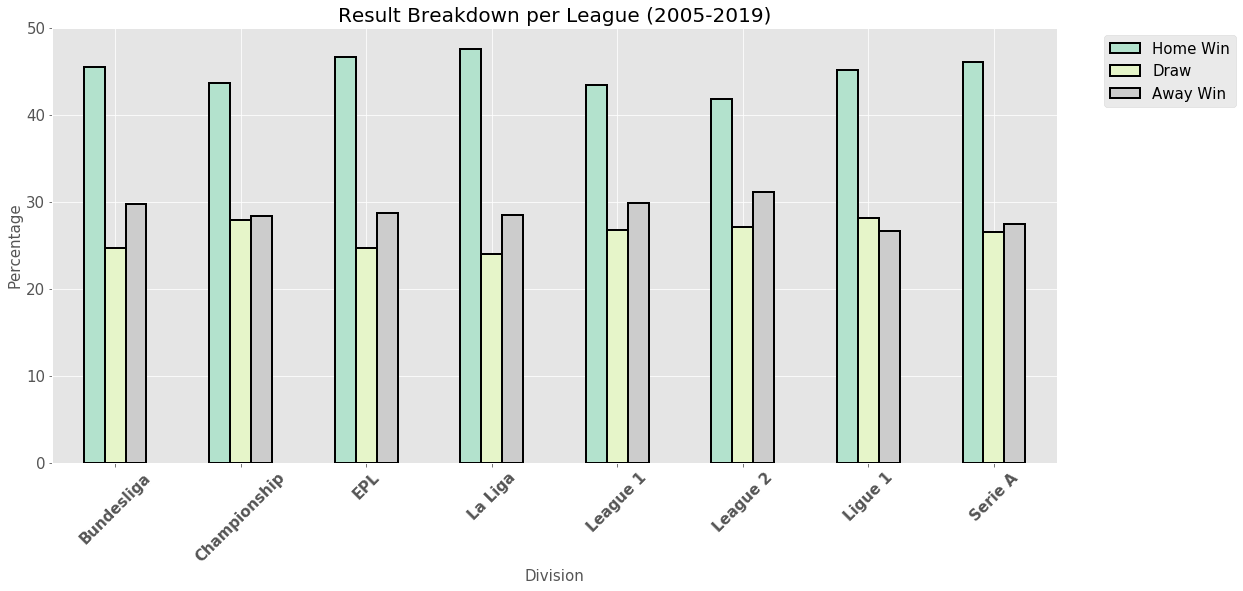

In [301]:
df_results_distribution = df.groupby(["Div", "FTR"]).count()["Date"]
df_results_distribution = (df_results_distribution.groupby("Div")
                           .apply(lambda g: (g/g.sum()*100)).unstack()[["H", "D", "A"]])
df_results_distribution.plot.bar(figsize = (18,8), rot = 45, colormap = "Pastel2",
                                 linewidth = 2, edgecolor = "k", fontsize = 15)
plt.xlabel("Division", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.xticks(weight="bold")
plt.xticks(weight="bold")
plt.title("Result Breakdown per League (2005-2019)", fontsize = 20)
plt.legend(["Home Win", "Draw", "Away Win"], bbox_to_anchor=(1.04,1), 
           loc="upper left", prop = {"size": 15});

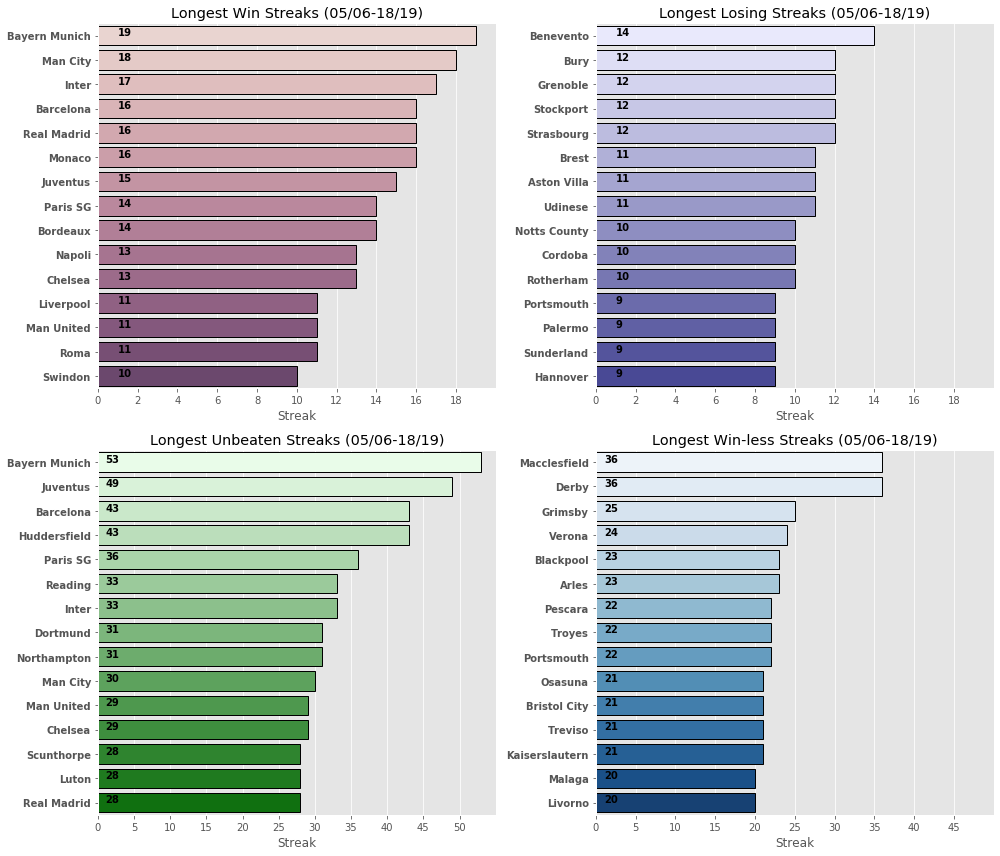

In [302]:
# longest winstreaks
full_df["Winner"] = full_df.apply(lambda x: winning_team(x), axis=1)

           
winstreaks = (pd.Series({team: winstreak(team) for team in full_df["HomeTeam"].unique()}) 
                      .sort_values(ascending=False)[:15].reset_index(name="Streak"))

drawstreaks = (pd.Series({team: drawstreak(team) for team in full_df["HomeTeam"].unique()}) 
                       .sort_values(ascending=False)[:15].reset_index(name="Streak"))

losingstreaks = (pd.Series({team: losing(team) for team in full_df["HomeTeam"].unique()})  
                          .sort_values(ascending=False)[:15].reset_index(name="Streak"))

unbeaten = (pd.Series({team: unbeaten(team) for team in full_df["HomeTeam"].unique()}) 
                     .sort_values(ascending=False)[:15].reset_index(name="Streak"))

winless = (pd.Series({team: winless(team) for team in full_df["HomeTeam"].unique()}) 
                   .sort_values(ascending=False)[:15].reset_index(name="Streak"))

plt.figure(figsize = (14,12))
plt.subplot(221)

ax = sns.barplot(y="index", x="Streak", data=winstreaks, linewidth = 1, 
                 edgecolor = "k", palette = sns.cubehelix_palette(20))
plt.ylabel("")
plt.title("Longest Win Streaks (05/06-18/19)")
plt.xlim((0,20))
plt.xticks(np.arange(0,19,2))
plt.yticks(weight="bold")
for i, j in enumerate(winstreaks["Streak"]):
    ax.text(1,i,j,weight = "bold")

plt.subplot(222)

ax = sns.barplot(y="index", x="Streak", data=losingstreaks, linewidth = 1, edgecolor = "k",
                palette=sns.light_palette("navy", 20))
plt.ylabel("")
plt.title("Longest Losing Streaks (05/06-18/19)")
plt.xlim((0,20))
plt.xticks(np.arange(0,19,2))
plt.yticks(weight="bold")
for i, j in enumerate(losingstreaks["Streak"]):
    ax.text(1,i,j,weight = "bold")

plt.subplot(223)

ax = sns.barplot(y="index", x="Streak", data=unbeaten, linewidth = 1, edgecolor = "k",
                palette=sns.light_palette("green", 15))
plt.ylabel("")
plt.title("Longest Unbeaten Streaks (05/06-18/19)")
plt.xlim((0,55))
plt.xticks(np.arange(0,55,5))
plt.yticks(weight="bold")
for i, j in enumerate(unbeaten["Streak"]):
    ax.text(1,i,j,weight = "bold")

plt.subplot(224)


ax = sns.barplot(y="index", x="Streak", data=winless, linewidth = 1, edgecolor = "k",
                palette=sns.color_palette("Blues", 15))
plt.ylabel("")
plt.title("Longest Win-less Streaks (05/06-18/19)")
plt.xlim((0,50))
plt.xticks(np.arange(0,50,5))
plt.yticks(weight="bold")
for i, j in enumerate(winless["Streak"]):
    ax.text(1,i,j,weight = "bold")

plt.tight_layout();



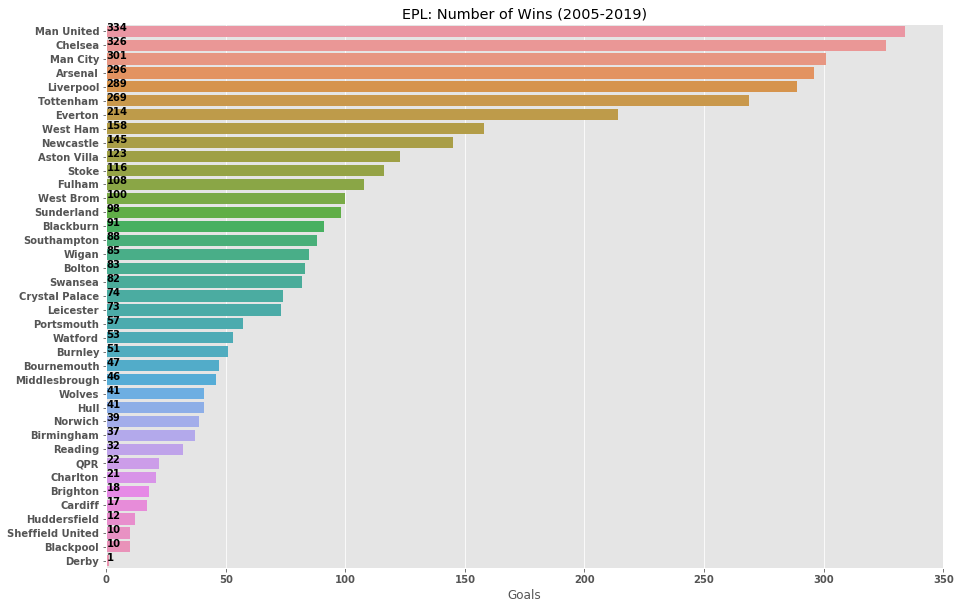

In [303]:
df_EPL["Winner"]  = df_EPL.apply(lambda x: winning_team(x), axis = 1)
winners = df_EPL["Winner"].value_counts()[1:].reset_index()
plt.figure(figsize = (15,10))
ax = sns.barplot(y = "index", x = "Winner", data = winners, orient = "h")
plt.title("EPL: Number of Wins (2005-2019)")
plt.ylabel("")
plt.xlabel("Goals")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
for i, j in enumerate(winners["Winner"]):
    ax.text(0.1,i,j,weight = "bold")

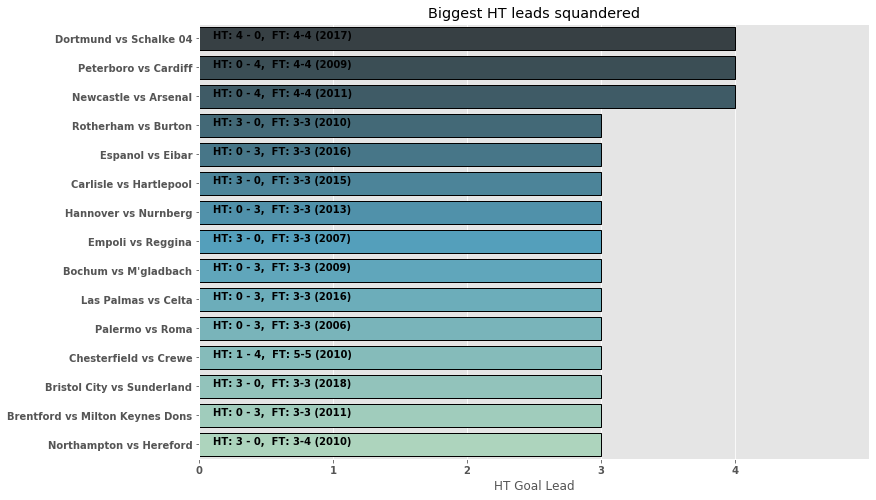

In [304]:
# biggest comebacks from HT 
df_comebacks = df.copy()
df_comebacks["HTGD"] = abs(df_comebacks["HTHG"] - df_comebacks["HTAG"])
df_comebacks = df_comebacks.sort_values(by = "HTGD", ascending = False)
half_time_leads_squandered = (df_comebacks[df_comebacks["HTR"] != 
                              df_comebacks["FTR"]][:15][["HomeTeam", "AwayTeam", "HTGD"]])
half_time_leads_squandered["Match"] = (half_time_leads_squandered["HomeTeam"] + " " + "vs" + " " + 
                                       half_time_leads_squandered["AwayTeam"])
plt.figure(figsize = (12,8))
ax = sns.barplot(y = "Match", x = "HTGD", data = half_time_leads_squandered, 
                 palette = "GnBu_d", linewidth = 1, edgecolor = "k")
plt.xlabel("HT Goal Lead")
plt.ylabel("")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.title("Biggest HT leads squandered")
plt.xlim((0,5))
plt.xticks(np.arange(0, 5, 1.0))
i = 0
for j in half_time_leads_squandered.index:
    ax.text(0.1, i, "HT:" + " " + str(int(df.iloc[j]["HTHG"])) +  " - " +
            str(int(df.iloc[j]["HTAG"])) + "," +  " "*2 + "FT:" + " " + 
            str(int(df.iloc[j]["FTHG"])) +  "-" + str(int(df.iloc[j]["FTAG"])) + " " + 
            "(" + str(df.iloc[j]["Date"].year) + ")", weight = "bold")
    i += 1;

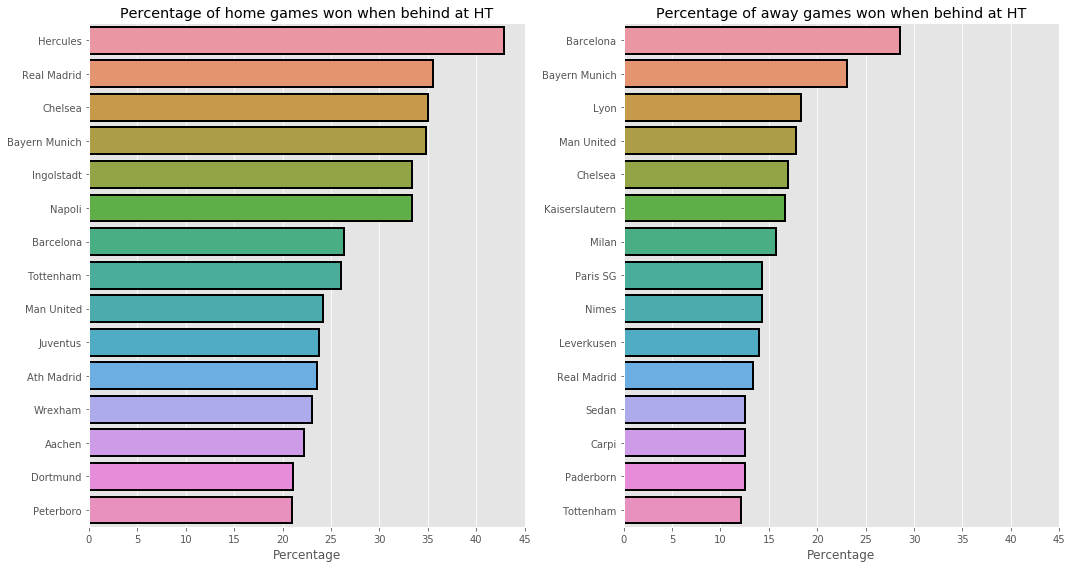

In [305]:
# Who's best from being behind at HT
# proportion of games won from behind at half time
# number of games won at FT/number of games down at HT

df_comeback_home = df[(df["HTR"] == "A") & (df["FTR"] == "H")]
df_comeback_away = df[(df["HTR"] == "H") & (df["FTR"] == "A")]
   

home_comebacks = (df_comeback_home.groupby("HomeTeam").count()["HTR"]
                  .sort_values(ascending=False).reset_index())
away_comebacks = (df_comeback_away.groupby("AwayTeam").count()["HTR"]
                  .sort_values(ascending=False).reset_index())


home_comebacks["HTR"] = (home_comebacks
                         .apply(lambda x: (x["HTR"]/total_ht_home_deficits(x["HomeTeam"]))*100, 
                                             axis = 1))
away_comebacks["HTR"] = (away_comebacks
                         .apply(lambda x: (x["HTR"]/total_ht_away_deficits(x["AwayTeam"]))*100, 
                                             axis = 1))


plt.figure(figsize = (15,8))
plt.subplot(121)
sns.barplot(y="HomeTeam", x="HTR", orient="h", 
            data=home_comebacks.sort_values(by="HTR", ascending=False)[:15],
            edgecolor = "k", linewidth = 2)
plt.ylabel("")
plt.xlabel("Percentage")
plt.title("Percentage of home games won when behind at HT")

plt.subplot(122)

sns.barplot(y="AwayTeam", x="HTR", orient="h", 
            data=away_comebacks.sort_values(by="HTR", ascending=False)[:15],
            edgecolor = "k", linewidth = 2)
plt.ylabel("")
plt.xlabel("Percentage")
plt.title("Percentage of away games won when behind at HT")
plt.xlim((0,45))

plt.tight_layout();



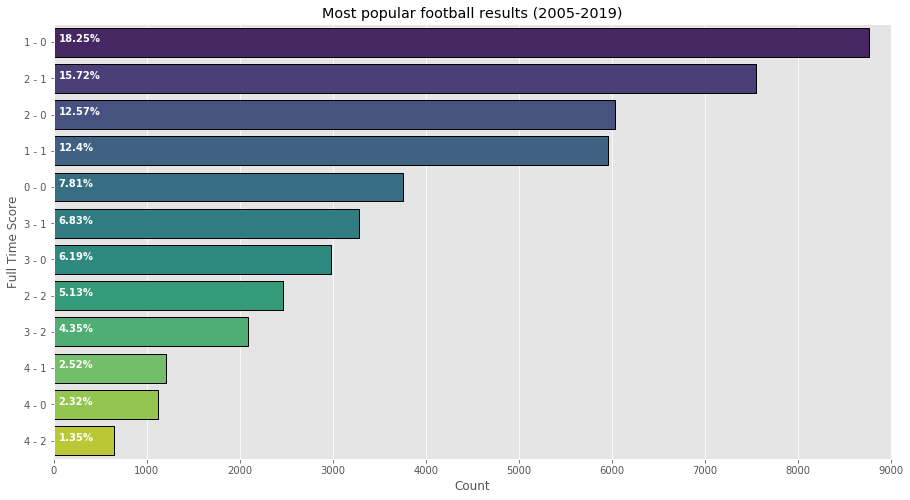

In [306]:
df_full_time_score = df[["Div", "FTHG", "FTAG"]]

df_full_time_score["FTS"] = df_full_time_score.apply(lambda x: full_time_score(x), axis = 1)
df_full_time_score = df_full_time_score["FTS"].value_counts()[:12].reset_index()
plt.figure(figsize = (15,8))
ax = sns.barplot(y = "index", x = "FTS", data = df_full_time_score, 
                 palette = "viridis", edgecolor = "k", linewidth = 1)
plt.ylabel("Full Time Score")
plt.xlabel("Count")
plt.title("Most popular football results (2005-2019)")
for i,j in enumerate(df_full_time_score["FTS"]):
    ax.text(50, i,str(round(j/len(df.index)*100,2)) + "%", 
            color = "white", weight = "bold")

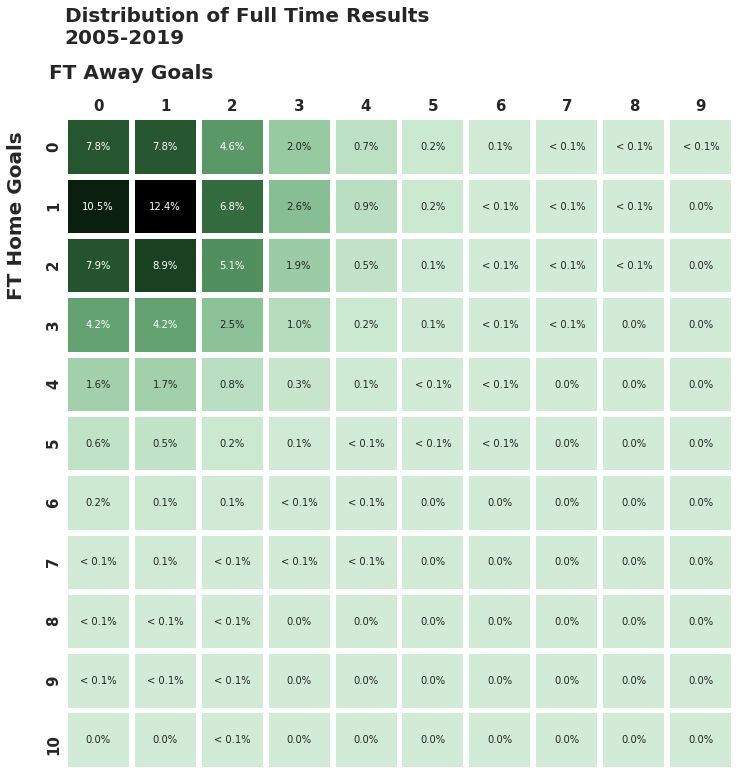

In [307]:
df_heatmap = pd.crosstab(df["FTHG"], df["FTAG"]).div(len(df.index))

# CREATE LABELS FOR THE DATAFRAME VIA ANNOT

df_heatmap_labels = df_heatmap.copy()
condition = (df_heatmap_labels < 1/2000) & (df_heatmap_labels > 0)  # less than 0.05% was rounded to 0%, losing vital info
df_heatmap_labels[condition] = "< 0.1"
df_heatmap_labels[df_heatmap_labels == 0] = "0.0"
condition2 = (df_heatmap_labels != "< 0.1") & (df_heatmap_labels != "0.0")
df_heatmap_labels[condition2] = df_heatmap_labels*100
s = df_heatmap_labels.stack()
df_heatmap_labels = pd.to_numeric(s,errors='coerce').round(1).fillna(s).unstack()
df_heatmap_labels = df_heatmap_labels.applymap(str)
df_heatmap_labels = df_heatmap_labels + "%"
df_heatmap_labels = df_heatmap_labels.values # transposes to a numpy array needed for annot in heatmap

# PLOT HEATMAP
with sns.axes_style("white"):

    plt.figure(figsize = (12,12))
    cmap1 = sns.cubehelix_palette(90, start = 5, rot = 0, dark = 0, 
                                  light = 0.9, as_cmap = True, gamma = 1.2)
    ax = sns.heatmap(df_heatmap, annot = df_heatmap_labels, cmap=cmap1, 
                     linewidths = 5, fmt = "", cbar = False)
    ax.set_ylim(11, 0)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    kwargsy = {"weight": "bold", "position":(0,0.85)}
    kwargsx = {"weight": "bold", "position":(0.1,0)}
    plt.ylabel("FT Home Goals", fontsize = 20, labelpad = 20, **kwargsy)
    plt.xlabel("FT Away Goals", fontsize = 20, labelpad = 20, **kwargsx)
    plt.xticks(fontsize = 15, weight = "bold")
    plt.yticks(fontsize = 15, weight = "bold")
    ax.tick_params(axis = "both", length = 0)
    plt.title("Distribution of Full Time Results \n2005-2019", 
              fontsize = 20, loc = "left", pad = 20, weight = "bold");

# Betting Analysis

In [308]:
df_inf_overround = df[(df["B365H"] == 0) | (df["B365D"] == 0) | (df["B365A"] == 0)]
df_inf_overround #  check for infinite overround

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,...,AST,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
25554,League 2,2013-01-12,Chesterfield,Northampton,3,0,3.0,0.0,H,H,...,3.0,6.0,1.0,0.0,2.0,0.0,0.0,0.0,3.60,3.25
26919,Championship,2013-04-27,Blackpool,Derby,2,1,1.0,0.0,H,H,...,6.0,3.0,6.0,3.0,3.0,0.0,0.0,0.0,3.40,3.40
33405,League 1,2015-03-28,Sheffield United,Crewe,1,2,0.0,1.0,A,A,...,4.0,13.0,8.0,3.0,2.0,2.0,0.0,0.0,5.25,10.00
46671,Championship,2019-02-02,Brentford,Blackburn,5,2,1.0,2.0,A,H,...,4.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,3.75,4.20
46908,League 1,2019-02-19,Portsmouth,Bristol Rvs,1,1,0.0,1.0,A,D,...,4.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,3.80,4.75


In [309]:
df["B365H"] = df.apply(lambda x: missing_odds(x), axis = 1)
df["Overround"] = ((1/df['B365H'] + 1/df['B365D'] + 1/df['B365A']) - 1)*100

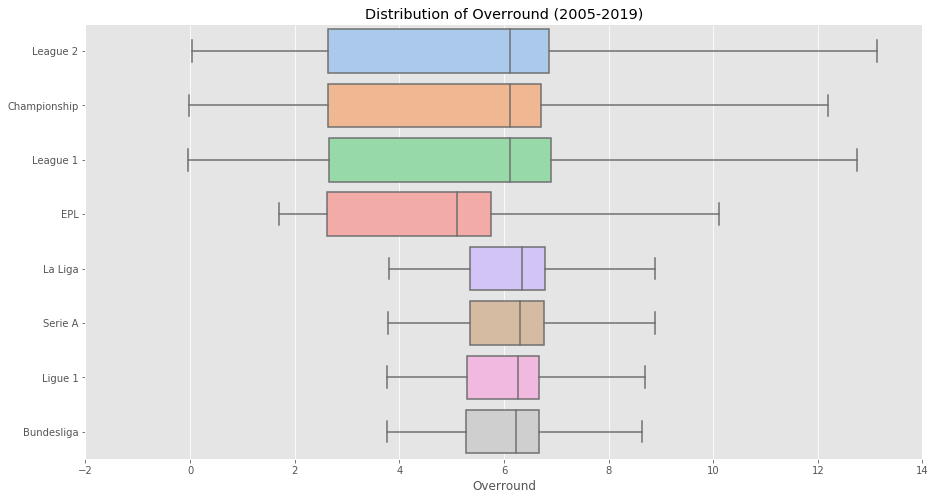

In [310]:
plt.figure(figsize = (15,8))
sns.boxplot(y = "Div", x = "Overround", data = df, orient = "h", 
            showfliers = False, palette = "pastel")
plt.ylabel("")
plt.title("Distribution of Overround (2005-2019)");

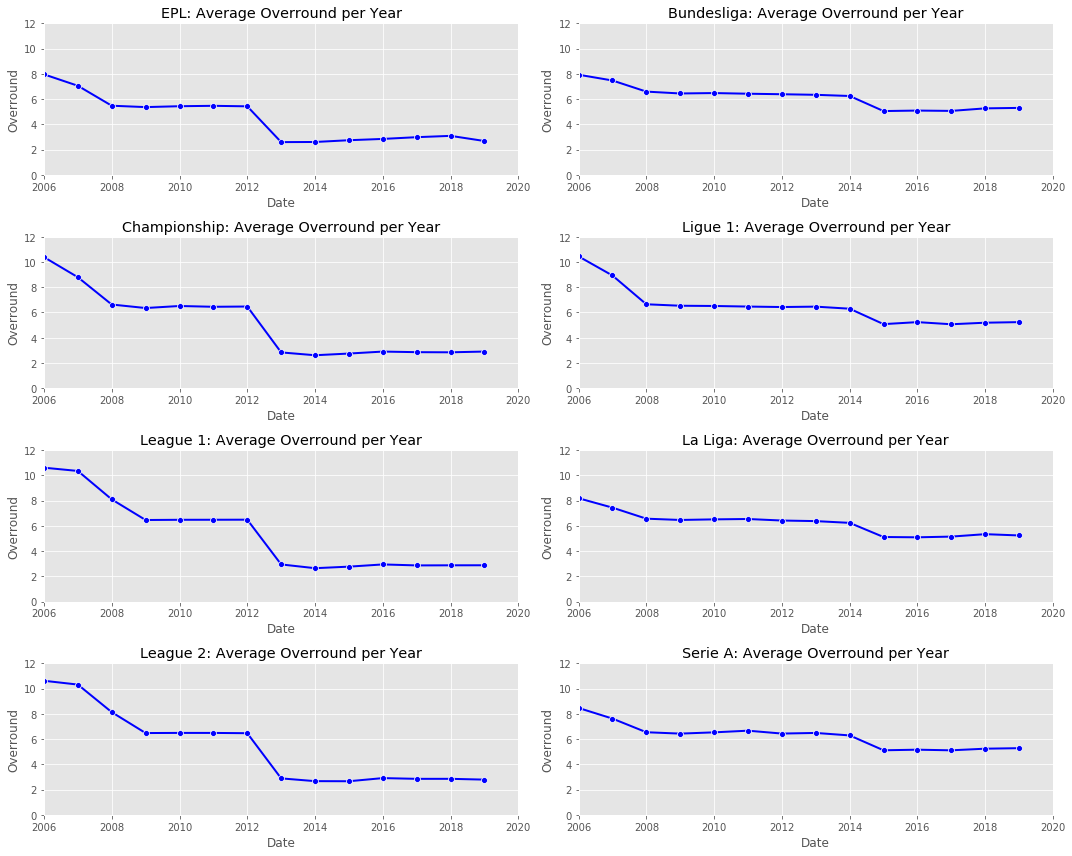

In [311]:
plt.figure(figsize=(15,12))
for i,league in enumerate(["EPL", "Bundesliga", "Championship", "Ligue 1", 
                           "League 1", "La Liga", "League 2", "Serie A"]):
    plt.subplot(4,2,i+1)
    data = df[(df["Div"] == league) & (df["Date"] > datetime.datetime(2006,1,1))].groupby(
        [df["Date"].dt.year]).agg({"Overround": "mean"}).reset_index()
    ax =  sns.lineplot(x = "Date", y = "Overround", data = data, marker = "o", 
                       color = "blue", linewidth = 2, palette = "pastel")
    plt.title(f"{league}: Average Overround per Year")
    plt.ylim((0, 12))
plt.tight_layout();

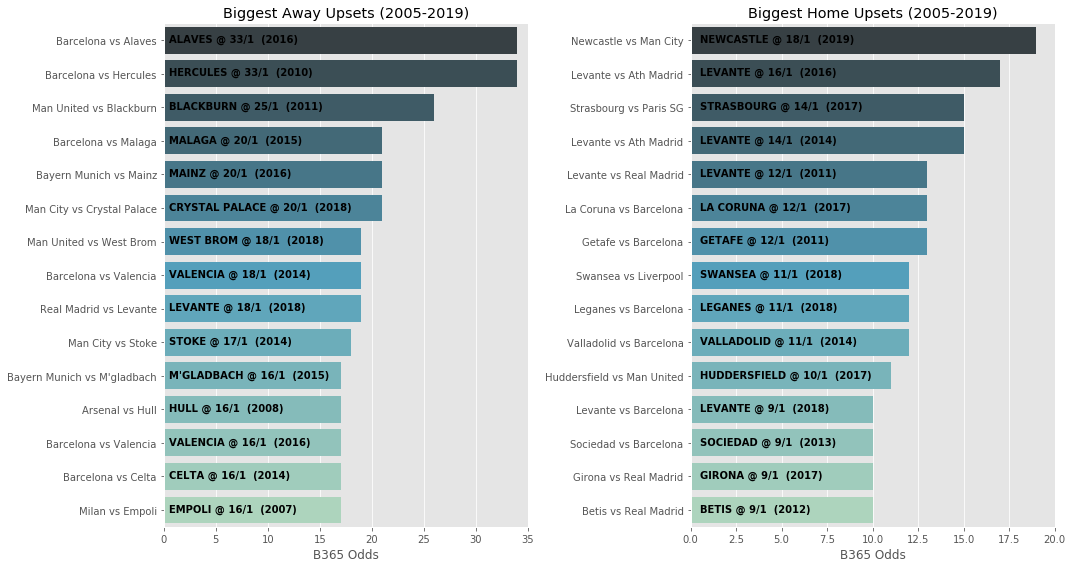

In [312]:
df_biggest_away_upsets = (df[df["FTR"] == "A"]
                          .sort_values(by = "B365A", 
                                       ascending = False)[["HomeTeam", "AwayTeam", "B365A"]][:15])
df_biggest_home_upsets = (df[df["FTR"] == "H"]
                          .sort_values(by = "B365H", 
                                       ascending = False)[["HomeTeam", "AwayTeam", "B365H"]][:15])
df_biggest_away_upsets["Match"] = (df_biggest_away_upsets["HomeTeam"] + " " + "vs" + 
                                   " " + df_biggest_away_upsets["AwayTeam"])
df_biggest_home_upsets["Match"] = (df_biggest_home_upsets["HomeTeam"] + " " + "vs" + 
                                   " " + df_biggest_home_upsets["AwayTeam"])
plt.figure(figsize = (15,8))
plt.subplot(121)
color = sns.cubehelix_palette(10, start=.5, rot=-.75, reverse = True)
ax = sns.barplot(y = df_biggest_away_upsets.reset_index().index, 
                 x = "B365A", data = df_biggest_away_upsets, palette = "GnBu_d",
                orient = "h")
ax.set_yticklabels(df_biggest_away_upsets["Match"])
plt.xlabel("B365 Odds")
plt.title("Biggest Away Upsets (2005-2019)")
plt.ylabel("")
for i, j in enumerate(df_biggest_away_upsets["B365A"]):
    ax.text(0.5,i+0.05, 
            df_biggest_away_upsets["AwayTeam"].iloc[i].upper() + " " + "@" + " " + 
            str(round(j-1)) + "/1" + " " + " " + "(" +
            str(df.iloc[df_biggest_away_upsets.index[i]]["Date"].year) + ")",
            weight = "bold")
plt.subplot(122)
ax = sns.barplot(y = df_biggest_home_upsets.reset_index().index, x = "B365H", 
                 data = df_biggest_home_upsets, orient = "h",
                 palette = "GnBu_d")
ax.set_yticklabels(df_biggest_home_upsets["Match"])
plt.xlabel("B365 Odds")
plt.title("Biggest Home Upsets (2005-2019)")
plt.tight_layout()
for i, j in enumerate(df_biggest_home_upsets["B365H"]):
    ax.text(0.5,i+0.05, 
            df_biggest_home_upsets["HomeTeam"].iloc[i].upper() + " " + "@" + " " + 
            str(round(j-1)) + "/1" + " " + " " + "(" +
            str(df.iloc[df_biggest_home_upsets.index[i]]["Date"].year) + ")",
            weight = "bold", color = "black")


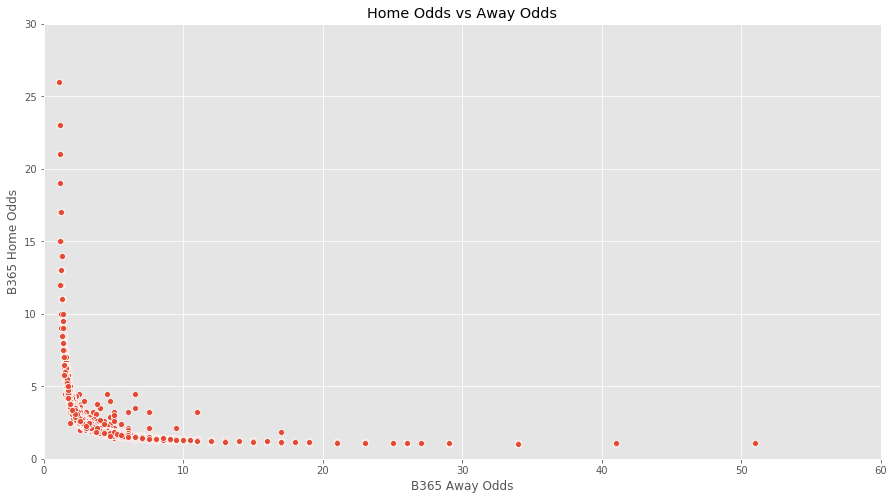

In [313]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "B365A", y = "B365H", data = df, palette = "cmap")
plt.xlabel("B365 Away Odds")
plt.ylabel("B365 Home Odds")
plt.title("Home Odds vs Away Odds");